<h1 style="color: #1DA1F2; font-family: Arial; text-align: center;">Twitter Sentiment Analysis</h1>

<img src="https://images.pexels.com/photos/5417837/pexels-photo-5417837.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" alt="Twitter Logo" style="width: 700px;"/>

### Import Libraries in NLP

In [1]:
import pandas as pd
import numpy as np 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import keras 
import tensorflow
import nltk
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits.mplot3d import Axes3D
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from textblob import TextBlob
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Data Inspection


In [2]:
#Validation dataset
val_data = pd.read_csv("twitter_validation.csv", header=None)

#Full dataset for Train-Test
train_data = pd.read_csv("twitter_training.csv", header=None)

In [3]:
train_data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Check Missing values

In [5]:
missing_values = train_data.isnull().sum()
missing_values

0      0
1      0
2      0
3    686
dtype: int64

### Data cleaning

In [6]:
train_data = train_data.dropna()
train_data

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
train_data.shape

(73996, 4)

In [8]:
# Handle NaN values
train_data.dropna(inplace=True)  # Remove rows with NaN values

# Find the most common words
freq_dist = FreqDist(train_data)
most_common_words = freq_dist.most_common(3)

print("\nMost common words:")
for word, frequency in most_common_words:
    print("-", word, ":", frequency)


Most common words:
- 0 : 1
- 1 : 1
- 2 : 1


In [9]:
# Display the first few rows of the dataset and the summary statistics
train_data.head(), train_data.describe(include='all')

(      0            1         2  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
                                                    3  
 0  im getting on borderlands and i will murder yo...  
 1  I am coming to the borders and I will kill you...  
 2  im getting on borderlands and i will kill you ...  
 3  im coming on borderlands and i will murder you...  
 4  im getting on borderlands 2 and i will murder ...  ,
                    0          1         2  \
 count   73996.000000      73996     73996   
 unique           NaN         32         4   
 top              NaN  MaddenNFL  Negative   
 freq             NaN       2377     22358   
 mean     6430.279231        NaN       NaN   
 std      3737.660027        NaN       NaN   
 min         1.000000        NaN       NaN   
 25%      3194.000000        NaN       NaN   
 50%      6417.500000        NaN     

In [10]:
# Correcting column headers based on assumptions about the data
train_data.columns = ['ID', 'Category', 'Sentiment', 'Text']

# Drop any rows where 'Text' is missing
train_data = train_data.dropna(subset=['Text'])

# Checking the cleaned data structure and missing values count
train_data.info(), train_data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73996 non-null  int64 
 1   Category   73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


(None,
      ID     Category Sentiment  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
                                                 Text  
 0  im getting on borderlands and i will murder yo...  
 1  I am coming to the borders and I will kill you...  
 2  im getting on borderlands and i will kill you ...  
 3  im coming on borderlands and i will murder you...  
 4  im getting on borderlands 2 and i will murder ...  )

In [11]:
# Correcting column headers based on assumptions about the data
val_data.columns = ['ID', 'Category', 'Sentiment', 'Text']

# Drop any rows where 'Text' is missing
val_data = val_data.dropna(subset=['Text'])

# Checking the cleaned data structure and missing values count
val_data.info(), val_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1000 non-null   int64 
 1   Category   1000 non-null   object
 2   Sentiment  1000 non-null   object
 3   Text       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


(None,
      ID   Category   Sentiment  \
 0  3364   Facebook  Irrelevant   
 1   352     Amazon     Neutral   
 2  8312  Microsoft    Negative   
 3  4371      CS-GO    Negative   
 4  4433     Google     Neutral   
 
                                                 Text  
 0  I mentioned on Facebook that I was struggling ...  
 1  BBC News - Amazon boss Jeff Bezos rejects clai...  
 2  @Microsoft Why do I pay for WORD when it funct...  
 3  CSGO matchmaking is so full of closet hacking,...  
 4  Now the President is slapping Americans in the...  )

C:\Users\apara\AppData\Local\Temp\ipykernel_58152\2402079061.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
C:\Users\apara\AppData\Local\Temp\ipykernel_58152\2402079061.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index, palette="coolwarm")


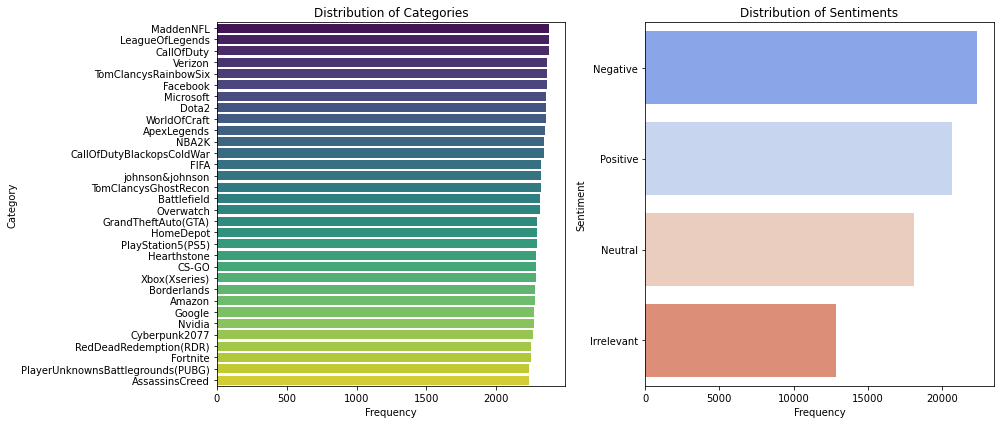

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualizations
plt.figure(figsize=(14, 6))

# Subplot 1: Distribution of Categories
plt.subplot(1, 2, 1)
category_counts = train_data['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Distribution of Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')

# Subplot 2: Distribution of Sentiments
plt.subplot(1, 2, 2)
sentiment_counts = train_data['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index, palette="coolwarm")
plt.title('Distribution of Sentiments')
plt.xlabel('Frequency')
plt.ylabel('Sentiment')

plt.tight_layout()
plt.show()

In [13]:
import heapq

# Handle NaN values
train_data.dropna(inplace=True)

# Find the n largest sentences 
n_largest = 2

# Define a function to get sentence length 
def sentence_length(sentence):
    return len(sentence)

# Get the n-largest sentences based on character count
largest_sentences = heapq.nlargest(n_largest, train_data['Text'], key=sentence_length) 

print("N largest sentences:")
for sentence in largest_sentences:
    print("-", sentence) 

N largest sentences:
- The event dedicated to Victory Day in the Great Patriotic War was held as part of the celebration of the 70th anniversary of Victory in the Great Patriotic War of 1941-1945, which was attended by veterans of the Great Patriotic War, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home
- At the same time,

### Statistics Summary

In [14]:
count_trainingstatistics = train_data['ID'].count()
print("Training Statistic Count in column ID:", count_trainingstatistics)

mean_trainingstatistics = train_data['ID'].mean()
print("Training Statistic Mean in column ID:", mean_trainingstatistics)

min_trainingstatistics = train_data['ID'].min()
print("Training Statistic Min in column ID:", min_trainingstatistics)

max_trainingstatistics = train_data['ID'].max()
print("Training Statistic Max in column ID:", max_trainingstatistics)

std_trainingstatistics = train_data['ID'].std()
print("Training Statistic Std in column ID:", std_trainingstatistics)

Training Statistic Count in column ID: 73996
Training Statistic Mean in column ID: 6430.279231309801
Training Statistic Min in column ID: 1
Training Statistic Max in column ID: 13200
Training Statistic Std in column ID: 3737.6600267664526


## Data Visualization

Index(['ID', 'Category', 'Sentiment', 'Text', 'Word_Count'], dtype='object')


C:\Users\apara\AppData\Local\Temp\ipykernel_58152\4283212110.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Sentiment', y='Word_Count', data=train_data, palette='coolwarm')


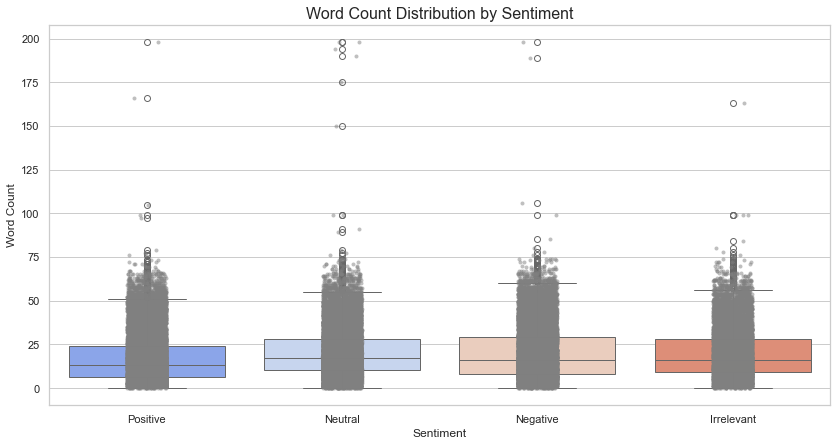

In [15]:
# Recreate 'Word_Count' column
train_data['Word_Count'] = train_data['Text'].apply(lambda x: len(x.split()))

# Check columns to ensure 'Word_Count' is present
print(train_data.columns)

# Plotting the box plot again
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
ax = sns.boxplot(x='Sentiment', y='Word_Count', data=train_data, palette='coolwarm')
ax.set_title('Word Count Distribution by Sentiment', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=12)
ax.set_ylabel('Word Count', fontsize=12)
sns.stripplot(x='Sentiment', y='Word_Count', data=train_data, size=4, color='gray', alpha=0.5)
plt.show()

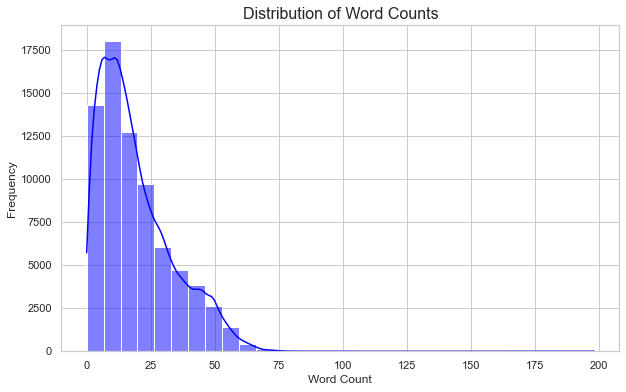

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure seaborn style is set for better aesthetics
sns.set(style="whitegrid")

# Create a histogram for the 'Word_Count' column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Word_Count'], bins=30, kde=True, color='blue')

# Adding title and labels
plt.title('Distribution of Word Counts', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


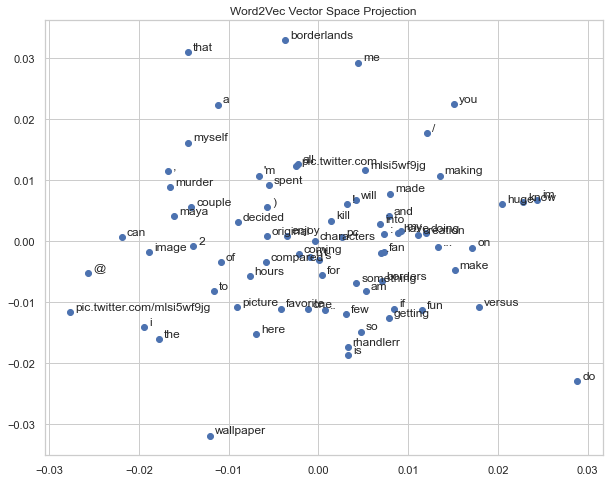

In [17]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# 'Text' is the column with text data
sentences = train_data['Text'].head(10).tolist()
sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Fit a 2D PCA model to the vectors
X = model.wv.vectors  # Access vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)  # Get vocabulary words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), xytext=(5, 2), textcoords='offset points')
plt.title('Word2Vec Vector Space Projection')
plt.show()


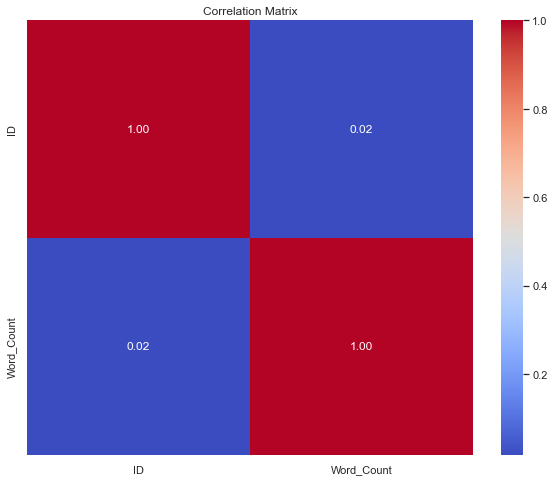

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

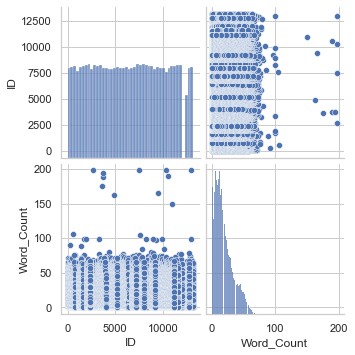

In [19]:
# train_data' is a DataFrame with numeric columns
sns.pairplot(train_data)
plt.show()

## Word Embeddings

In [20]:
# Tokenization and Lowercasing with NLTK
tokens = [word_tokenize(text.lower()) for text in train_data['Text']]

In [21]:
# TF-IDF Vectorization

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data['Text'])

In [22]:
# Word2Vec Model
word2vec_model = Word2Vec(tokens, min_count=1)

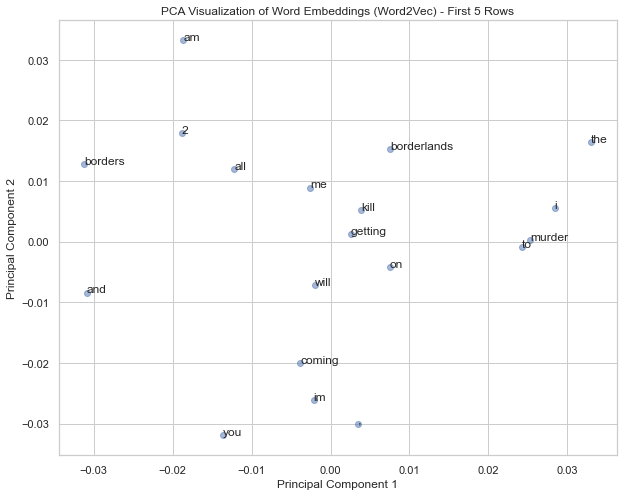

In [23]:
# Subset the first 5 rows of the data
subset_data = train_data.head(5)

# Tokenization and Lowercasing with NLTK for the subset
subset_tokens = [word_tokenize(text.lower()) for text in subset_data['Text']]

# Word2Vec Model for the subset
subset_word2vec_model = Word2Vec(subset_tokens, min_count=1)

# Visualizing Word Embeddings with PCA for the subset
X_word2vec_subset = subset_word2vec_model.wv[subset_word2vec_model.wv.key_to_index]
pca = PCA(n_components=2)
result_word2vec_subset = pca.fit_transform(X_word2vec_subset)

plt.figure(figsize=(10, 8))
plt.scatter(result_word2vec_subset[:, 0], result_word2vec_subset[:, 1], alpha=0.5)
subset_words = list(subset_word2vec_model.wv.index_to_key)
for i, word in enumerate(subset_words):
    plt.annotate(word, xy=(result_word2vec_subset[i, 0], result_word2vec_subset[i, 1]))
plt.title('PCA Visualization of Word Embeddings (Word2Vec) - First 5 Rows')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Bag of words 

In [24]:
# Bag-of-Words Model For Columns

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_data['Text'])

# Displaying the feature names
vectorizer.get_feature_names_out()

array(['00', '000', '00011', ..., 'การออกอากาศของฉ', 'นจาก', 'ℐℓ٥'],
      dtype=object)

In [25]:
# Bag-of-Words Model For Columns

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_data['Sentiment'])

# Displaying the feature names
vectorizer.get_feature_names_out()

array(['irrelevant', 'negative', 'neutral', 'positive'], dtype=object)

#### Summarize Vocab

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# list of text documents
text = ["im getting on borderlands and i will kill you all,",
 "The borderlands",
 "The kill"]

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

# encode document
vector = vectorizer.transform([text[0]])

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'im': 4, 'getting': 3, 'on': 6, 'borderlands': 2, 'and': 1, 'will': 8, 'kill': 5, 'you': 9, 'all': 0, 'the': 7}
[1.69314718 1.69314718 1.28768207 1.69314718 1.69314718 1.28768207
 1.69314718 1.28768207 1.69314718 1.69314718]
(1, 10)
[[0.35013871 0.35013871 0.26628951 0.35013871 0.35013871 0.26628951
  0.35013871 0.         0.35013871 0.35013871]]


#### Bag-of-Words with Keras


In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample text documents
docs = [
    "I am coming to the borders and I will kill you all,",
    "im getting on borderlands and i will kill you all,",
    "im coming on borderlands and i will murder you all,",
    "im getting on borderlands 2 and i will murder you me all,",
    "im getting into borderlands and i can murder you all,",
    "So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan ...",
    "So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderla...",
    "So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and..."
]

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

# Fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)

# Examine what the tokenizer has learned
word_index = tokenizer.word_index
print(f"Word Index: {word_index}")

Word Index: {'<OOV>': 1, 'i': 2, 'you': 3, 'and': 4, 'borderlands': 5, 'a': 6, 'all': 7, 'will': 8, 'im': 9, 'getting': 10, 'on': 11, 'murder': 12, 'so': 13, 'spent': 14, 'hours': 15, 'something': 16, 'for': 17, 'fun': 18, 'if': 19, "don't": 20, 'know': 21, 'huge': 22, 'am': 23, 'coming': 24, 'kill': 25, 'few': 26, 'fan': 27, 'doing': 28, "i'm": 29, 'to': 30, 'the': 31, 'borders': 32, '2': 33, 'me': 34, 'into': 35, 'can': 36, 'making': 37, 'couple': 38, 'of': 39, 'that': 40, 'borderla': 41}


#### Summarize Documents


In [28]:
import keras

# Define 5 documents
docs = [
    'kill',
    'fun',
    'hour',
    'me',
    'you',
    'murder',
    'statisfying',
    'dissapointment',
    'all',
    'fun'
]

# Create the tokenizer
t = Tokenizer()  # Corrected by removing the incorrect argument

# Fit the tokenizer on the documents
t.fit_on_texts(docs)

# Summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# Integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

OrderedDict([('kill', 1), ('fun', 2), ('hour', 1), ('me', 1), ('you', 1), ('murder', 1), ('statisfying', 1), ('dissapointment', 1), ('all', 1)])
10
{'fun': 1, 'kill': 2, 'hour': 3, 'me': 4, 'you': 5, 'murder': 6, 'statisfying': 7, 'dissapointment': 8, 'all': 9}
defaultdict(<class 'int'>, {'kill': 1, 'fun': 2, 'hour': 1, 'me': 1, 'you': 1, 'murder': 1, 'statisfying': 1, 'dissapointment': 1, 'all': 1})
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Summarize Vocabulary


In [29]:
from gensim.models import Word2Vec

# Define training data
sentences = [
    ['I', 'am', 'coming', 'to', 'the', 'borders', 'and', 'I', 'will', 'kill', 'you', 'all,'],
    ['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all,'],
    ['that', 'was', 'the', 'first', 'borderlands', 'session', 'in', 'a', 'long', 'time', 'where', 'i', 'actually', 'had', 'a', 'really', 'satisfying', 'comba...'],
    ['The', 'biggest', 'disappointment', 'of', 'my', 'life', 'came', 'a', 'year', 'ago.'],
    ['WE', 'FINISHED', 'BORDERLANDS 3', 'FINALLY YAS!', 'Thank you', 'for', 'hanging', 'out', 'everyone!', 'It', 'was', 'fun.', 'I', 'will', 'try', 'to...'],
    
    # Tokenized new sentence added
    ['Guilty', 'of', 'sobriety!', 'A', 'bit', 'of', 'a', 'borderline.', 'I', 'was', 'called', 'to', 'work', 'early', 'tomorrow', 'so', 'I can"t', 'catch', 'up.']
]

# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Summarize the loaded model
print(model)

# Summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# Access vector for one word using the correct method
print(model.wv['I'])

Word2Vec(vocab=65, vector_size=100, alpha=0.025)
['I', 'a', 'of', 'was', 'will', 'kill', 'borderlands', 'all,', 'you', 'i', 'and', 'the', 'to', 'long', 'am', 'comba...', 'satisfying', 'really', 'had', 'actually', 'where', 'time', 'in', 'coming', 'borders', 'session', 'first', 'that', 'biggest', 'on', 'getting', 'im', 'The', 'up.', 'catch', 'fun.', 'I can"t', 'so', 'tomorrow', 'early', 'work', 'called', 'borderline.', 'bit', 'A', 'sobriety!', 'Guilty', 'to...', 'try', 'It', 'my', 'everyone!', 'out', 'hanging', 'for', 'Thank you', 'FINALLY YAS!', 'BORDERLANDS 3', 'FINISHED', 'WE', 'ago.', 'year', 'came', 'life', 'disappointment']
[-4.8514313e-04  2.9755878e-04  5.0569633e-03  9.0700649e-03
 -9.3663847e-03 -7.2399112e-03  6.5501477e-03  9.1506578e-03
 -5.0440445e-03 -4.0652421e-03  7.4472367e-03 -1.5988173e-03
 -4.5828097e-03  6.6381628e-03 -4.7717565e-03 -1.8137333e-03
  2.9617490e-03  9.5924450e-04 -8.3661694e-03 -9.4061969e-03
  7.4011679e-03  5.1165596e-03  6.8797036e-03  7.4227125e-0

#### Text Classification


In [30]:
# Preprocess text (using NLTK for word tokenization)
train_data['tokenized_text'] = train_data['Sentiment'].apply(nltk.word_tokenize)

# Join tokenized words into sentences
train_data['text'] = train_data['tokenized_text'].apply(' '.join)

# Create vocabulary and sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])
word_index = tokenizer.word_index

def text_to_sequence(text, word_index):
    return [word_index.get(word, 0) for word in text]

sequences = train_data['tokenized_text'].apply(lambda x: text_to_sequence(x, word_index))

# Pad sequences
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [31]:
train_data.columns

Index(['ID', 'Category', 'Sentiment', 'Text', 'Word_Count', 'tokenized_text',
       'text'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.sequence import pad_sequences

le = LabelEncoder()
train_data['target'] = le.fit_transform(train_data['Sentiment'])

# Define problem
vocab_size = len(word_index) + 1
max_length = 100

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=8))  # Removed input_length parameter
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert 'padded_sequences' to numpy array
padded_sequences = np.array(padded_sequences)

model.fit(padded_sequences, train_data['target'], epochs=10, batch_size=32, validation_split=0.2)

# Summarize the model
print(model.summary())

Epoch 1/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 3s 959us/step - accuracy: 0.2903 - loss: -12229.5918 - val_accuracy: 0.3523 - val_loss: -112095.5781
Epoch 2/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.2898 - loss: -163051.4688 - val_accuracy: 0.3523 - val_loss: -389332.2188
Epoch 3/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.2863 - loss: -464171.4062 - val_accuracy: 0.3523 - val_loss: -787090.2500
Epoch 4/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2909 - loss: -870672.5625 - val_accuracy: 0.3523 - val_loss: -1295267.0000
Epoch 5/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2903 - loss: -1360955.8750 - val_accuracy: 0.3523 - val_loss: -1910018.7500
Epoch 6/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2918 - loss: -1993997.6250 - val_accuracy: 0.3523 - val_loss: -2626127.5000
Epoch 7/10
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2917 - loss: -2676450.0000 - val_accuracy: 0.3523 - val_loss: -3447845

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 8)              │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             801 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,525 (9.87 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,684 (6.58 KB)

None


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Handle NaN values
train_data.dropna(inplace=True)  # Remove rows with NaN values

# If column names are different, please adjust accordingly
X = train_data['Sentiment']
y = train_data['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00      2696
    Negative       1.00      1.00      1.00      4380
     Neutral       1.00      1.00      1.00      3605
    Positive       1.00      1.00      1.00      4119

    accuracy                           1.00     14800
   macro avg       1.00      1.00      1.00     14800
weighted avg       1.00      1.00      1.00     14800



In [34]:
import pandas as pd
from textblob import TextBlob

# Handle NaN values if necessary
train_data.dropna(subset=['Sentiment'], inplace=True)

# Calculating sentiment polarity for each review
train_data['Sentiment'] = train_data['Sentiment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Displaying the DataFrame with the sentiment column
print(train_data)

         ID     Category  Sentiment  \
0      2401  Borderlands   0.227273   
1      2401  Borderlands   0.227273   
2      2401  Borderlands   0.227273   
3      2401  Borderlands   0.227273   
4      2401  Borderlands   0.227273   
...     ...          ...        ...   
74677  9200       Nvidia   0.227273   
74678  9200       Nvidia   0.227273   
74679  9200       Nvidia   0.227273   
74680  9200       Nvidia   0.227273   
74681  9200       Nvidia   0.227273   

                                                    Text  Word_Count  \
0      im getting on borderlands and i will murder yo...          11   
1      I am coming to the borders and I will kill you...          12   
2      im getting on borderlands and i will kill you ...          10   
3      im coming on borderlands and i will murder you...          10   
4      im getting on borderlands 2 and i will murder ...          12   
...                                                  ...         ...   
74677  Just realized that t